Duplex Analysis

In [ ]:
# download Claude poems
import gdown

url = "https://drive.google.com/file/d/1eCbSyyBwGf7N7I8qc8ysuRv27gXBjL2l/view"
output = "claude_poems_clean.csv"
gdown.download(url=url, output=output, fuzzy=True)


Downloading...
From: https://drive.google.com/uc?id=1eCbSyyBwGf7N7I8qc8ysuRv27gXBjL2l
To: /content/claude_poems_clean.csv
100%|██████████| 182k/182k [00:00<00:00, 62.9MB/s]


'claude_poems_clean.csv'

In [ ]:
# load in csv
import pandas as pd

duplexes_df = pd.read_csv("claude_poems_clean.csv")

duplexes_df

,subject,with_brown,prompt_type,poem_text,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,abuse,True,general,\n\nThe bruises fade but never quite disappear...,NaN,NaN,NaN
1,abuse,True,figurative,\n\nThe bruises fade but never really leave\nT...,NaN,NaN,NaN
2,abuse,True,specific,\n\nThe kitchen door still swings without a so...,NaN,NaN,NaN
3,activities,True,general,\n\nI fold the laundry while the coffee brews ...,NaN,NaN,NaN
4,activities,True,figurative,\n\nThe morning calls but I refuse to rise\nTh...,NaN,NaN,NaN
...,...,...,...,...,...,...,...
253,weather,False,figurative,\nThe sky bruises purple before the rain falls...,NaN,NaN,NaN
254,weather,False,specific,"\nThe weatherman predicted rain by three,\nbut...",NaN,NaN,NaN
255,youth,False,general,\nWe used to think that time would wait for us...,NaN,NaN,NaN
256,youth,False,figurative,\nWe thought the world would wait for us to gr...,NaN,NaN,NaN


In [ ]:
# print a random Claude duplex
import random

print(duplexes_df["poem_text"].iloc[random.randint(0, len(duplexes_df) - 1)])



We scroll through strangers' pain like morning news
We scroll through strangers' pain like morning news
Each tragedy becomes our daily blues
Each tragedy becomes our daily blues
While comfort keeps us safe from harder truths
While comfort keeps us safe from harder truths
We share our outrage with a single click
We share our outrage with a single click
But never let the real world make us sick
But never let the real world make us sick
Our conscience sleeps behind a glowing screen
Our conscience sleeps behind a glowing screen
We practice empathy we've never seen
We practice empathy we've never seen
We scroll through strangers' pain like morning news


Calculating Average Number of Lines

In [ ]:
# as a baseline, count Brown's actual duplexes
# download them first

url = "https://drive.google.com/file/d/1SqTw3A99hPDbTUxZ-OoJD4wGdl0ZF3Oz/view?usp=drive_link"
output = "brown_poems.csv"
gdown.download(url=url, output=output, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1SqTw3A99hPDbTUxZ-OoJD4wGdl0ZF3Oz
To: /content/brown_poems.csv
100%|██████████| 3.18k/3.18k [00:00<00:00, 3.37MB/s]


'brown_poems.csv'

In [ ]:
# read them in
brown_poems_df = pd.read_csv("brown_poems.csv")

brown_poems_df


,author,poem_title,poem_text,form
0,Jericho Brown,Duplex (p. 18),A poem is a gesture toward home.\nIt makes dar...,duplex
1,Jericho Brown,Duplex (p. 27),The opposite of rape is understanding\nA field...,duplex
2,Jericho Brown,Duplex (p. 49),"I begin with love, hoping to end there.\nI don...",duplex
3,Jericho Brown,Duplex (p. 68),Don't accuse me of sleeping with your man\nWhe...,duplex
4,Jericho Brown,Duplex: Cento (p. 72),"My last love drove a burgundy car,\nColor of a...",duplex


In [ ]:
brown_poems_df["poem_length"] = brown_poems_df["poem_text"].apply(lambda poem: len([line for line in poem.split("\n") if line.strip() != ""]))

brown_poems_df["poem_length"].describe()

,poem_length
count,5.0
mean,14.0
std,0.0
min,14.0
25%,14.0
50%,14.0
75%,14.0
max,14.0


In [ ]:
# do the same for the Claude duplexes

duplexes_df["poem_length"] = duplexes_df["poem_text"].apply(lambda poem: len([line for line in poem.split("\n") if line.strip() != ""]))

duplexes_df["poem_length"].describe()

,poem_length
count,258.000000
mean,14.666667
std,1.841304
min,8.000000
25%,14.000000
50%,15.000000
75%,16.000000
max,24.000000


Pronoun Analysis

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 57.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# load the model
import spacy

nlp = spacy.load("en_core_web_sm")

In [ ]:
# clunky pronoun counting function
def count_pronouns(poem_text):
    poem = nlp(poem_text)

    # initialize counters
    counts = {
        "pronoun_count": 0,
        "plural_1_count": 0,
        "plural_2_count": 0,
        "plural_3_count": 0,
        "sing_1_count": 0,
        "sing_2_count": 0,
        "sing_3_count": 0
    }

    for token in poem:
        if token.pos_ == "PRON":
            counts["pronoun_count"] += 1

            if token.morph.get("Number") == ["Plur"]:
                if token.morph.get("Person") == ["1"]:
                    counts["plural_1_count"] += 1
                elif token.morph.get("Person") == ["2"]:
                    counts["plural_2_count"] += 1
                elif token.morph.get("Person") == ["3"]:
                    counts["plural_3_count"] += 1
            else:
                if token.morph.get("Person") == ["1"]:
                    counts["sing_1_count"] += 1
                elif token.morph.get("Person") == ["2"]:
                    counts["sing_2_count"] += 1
                elif token.morph.get("Person") == ["3"]:
                    counts["sing_3_count"] += 1

    return pd.Series(counts)

In [ ]:
# count the pronouns in Brown's poems
brown_poems_df[["pronoun_count", "plural_1_count", "plural_2_count",
                "plural_3_count", "sing_1_count", "sing_2_count",
                "sing_3_count"]] = brown_poems_df["poem_text"].apply(count_pronouns)

brown_poems_df

,author,poem_title,poem_text,form,poem_length,pronoun_count,plural_1_count,plural_2_count,plural_3_count,sing_1_count,sing_2_count,sing_3_count
0,Jericho Brown,Duplex (p. 18),A poem is a gesture toward home.\nIt makes dar...,duplex,14,14,1,0,0,8,0,5
1,Jericho Brown,Duplex (p. 27),The opposite of rape is understanding\nA field...,duplex,14,6,0,0,0,6,0,0
2,Jericho Brown,Duplex (p. 49),"I begin with love, hoping to end there.\nI don...",duplex,14,25,1,0,0,13,1,0
3,Jericho Brown,Duplex (p. 68),Don't accuse me of sleeping with your man\nWhe...,duplex,14,18,2,0,0,7,4,4
4,Jericho Brown,Duplex: Cento (p. 72),"My last love drove a burgundy car,\nColor of a...",duplex,14,12,3,0,2,5,0,2


In [ ]:
# count the pronouns in the Claude poems
duplexes_df[["pronoun_count", "plural_1_count", "plural_2_count",
                "plural_3_count", "sing_1_count", "sing_2_count",
                "sing_3_count"]] = duplexes_df["poem_text"].apply(count_pronouns)

duplexes_df

,subject,with_brown,prompt_type,poem_text,Unnamed: 4,Unnamed: 5,Unnamed: 6,poem_length,pronoun_count,plural_1_count,plural_2_count,plural_3_count,sing_1_count,sing_2_count,sing_3_count
0,abuse,True,general,\n\nThe bruises fade but never quite disappear...,NaN,NaN,NaN,16,14,0,0,2,6,0,0
1,abuse,True,figurative,\n\nThe bruises fade but never really leave\nT...,NaN,NaN,NaN,15,20,0,0,2,12,0,4
2,abuse,True,specific,\n\nThe kitchen door still swings without a so...,NaN,NaN,NaN,15,16,2,0,0,8,2,2
3,activities,True,general,\n\nI fold the laundry while the coffee brews ...,NaN,NaN,NaN,14,16,0,0,0,12,0,0
4,activities,True,figurative,\n\nThe morning calls but I refuse to rise\nTh...,NaN,NaN,NaN,16,24,0,0,0,20,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,weather,False,figurative,\nThe sky bruises purple before the rain falls...,NaN,NaN,NaN,14,6,4,0,2,0,0,0
254,weather,False,specific,"\nThe weatherman predicted rain by three,\nbut...",NaN,NaN,NaN,16,20,7,0,0,1,1,7
255,youth,False,general,\nWe used to think that time would wait for us...,NaN,NaN,NaN,16,18,18,0,0,0,0,0
256,youth,False,figurative,\nWe thought the world would wait for us to gr...,NaN,NaN,NaN,14,15,13,0,0,0,0,0


In [ ]:
# get value count of duplexes_df["pronoun_count"]
duplexes_df["pronoun_count"].describe()

,pronoun_count
count,258.000000
mean,15.693798
std,7.201602
min,0.000000
25%,10.000000
50%,16.000000
75%,20.000000
max,34.000000


In [ ]:
brown_poems_df["pronoun_count"].describe()

,pronoun_count
count,5.000000
mean,15.000000
std,7.071068
min,6.000000
25%,12.000000
50%,14.000000
75%,18.000000
max,25.000000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# normalizing function
def normalize_pronoun_counts(df):
    normalized_df = df.copy()

    # calculate proportions for each pronoun type
    normalized_df['plural_1_prop'] = df['plural_1_count'] / df['pronoun_count']
    normalized_df['plural_2_prop'] = df['plural_2_count'] / df['pronoun_count']
    normalized_df['plural_3_prop'] = df['plural_3_count'] / df['pronoun_count']
    normalized_df['sing_1_prop'] = df['sing_1_count'] / df['pronoun_count']
    normalized_df['sing_2_prop'] = df['sing_2_count'] / df['pronoun_count']
    normalized_df['sing_3_prop'] = df['sing_3_count'] / df['pronoun_count']

    # Replace NaN (from division by zero when pronoun_count=0) with 0
    normalized_df = normalized_df.fillna(0)

    return normalized_df

In [ ]:
# normalize both dataframes
brown_normalized = normalize_pronoun_counts(brown_poems_df)
claude_normalized = normalize_pronoun_counts(duplexes_df)

# calculate mean proportions for each dataset
pronoun_types = ['plural_1_prop', 'plural_2_prop', 'plural_3_prop',
                 'sing_1_prop', 'sing_2_prop', 'sing_3_prop']

brown_means = brown_normalized[pronoun_types].mean()
claude_means = claude_normalized[pronoun_types].mean()

# create comparison dataframe
comparison_df = pd.DataFrame({
    'Brown Poems': brown_means,
    'Claude Duplexes': claude_means,
    'Difference': claude_means - brown_means
})

print("Average Normalized Pronoun Counts:")
print(comparison_df)
print("\n")


Average Normalized Pronoun Counts:
               Brown Poems  Claude Duplexes  Difference
plural_1_prop     0.094508         0.234173    0.139665
plural_2_prop     0.000000         0.000000    0.000000
plural_3_prop     0.033333         0.082622    0.049289
sing_1_prop       0.579397         0.288074   -0.291322
sing_2_prop       0.052444         0.060702    0.008257
sing_3_prop       0.149206         0.124015   -0.025192




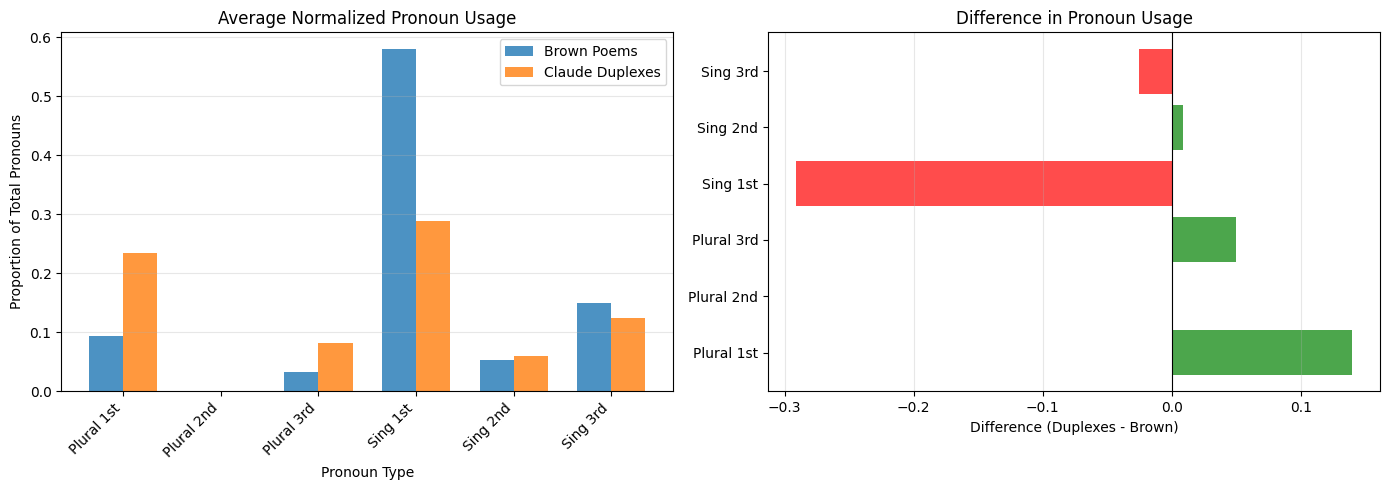

In [ ]:
# visualize the comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# bar chart comparison
labels = ['Plural 1st', 'Plural 2nd', 'Plural 3rd',
          'Sing 1st', 'Sing 2nd', 'Sing 3rd']
x = np.arange(len(labels))
width = 0.35

axes[0].bar(x - width/2, brown_means, width, label='Brown Poems', alpha=0.8)
axes[0].bar(x + width/2, claude_means, width, label='Claude Duplexes', alpha=0.8)
axes[0].set_xlabel('Pronoun Type')
axes[0].set_ylabel('Proportion of Total Pronouns')
axes[0].set_title('Average Normalized Pronoun Usage')
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Difference plot
colors = ['green' if x > 0 else 'red' for x in comparison_df['Difference']]
axes[1].barh(labels, comparison_df['Difference'], color=colors, alpha=0.7)
axes[1].set_xlabel('Difference (Duplexes - Brown)')
axes[1].set_title('Difference in Pronoun Usage')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

Distinctive Words

In [ ]:
# download Hessel's implementation of "fightin words"
!wget https://raw.githubusercontent.com/jmhessel/FightingWords/refs/heads/master/fighting_words_py3.py

--2025-12-10 17:37:58--  https://raw.githubusercontent.com/jmhessel/FightingWords/refs/heads/master/fighting_words_py3.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2967 (2.9K) [text/plain]
Saving to: ‘fighting_words_py3.py’

fighting_words_py3. 100%[===================>]   2.90K  --.-KB/s    in 0s      

2025-12-10 17:37:58 (33.0 MB/s) - ‘fighting_words_py3.py’ saved [2967/2967]



In [ ]:
# import it
import fighting_words_py3

In [ ]:
# run it
brown_poems = brown_poems_df["poem_text"].tolist()
duplexes = duplexes_df["poem_text"].tolist()

results = fighting_words_py3.bayes_compare_language(
    brown_poems,
    duplexes,
    prior = .05,
)

results

Vocab size is 257
Comparing language...


[('we', np.float64(-1.8334633038826094)),
 ('what', np.float64(-1.4090335828471878)),
 ('that', np.float64(-1.1088437718672006)),
 ('through', np.float64(-1.0418756795428115)),
 ('each', np.float64(-0.9647662835664413)),
 ('while', np.float64(-0.8830584725395548)),
 ('still', np.float64(-0.8770757367968005)),
 ('her', np.float64(-0.8331170868576045)),
 ('their', np.float64(-0.8179395314060671)),
 ('never', np.float64(-0.8050267670470637)),
 ('from', np.float64(-0.7841739343149686)),
 ('silence', np.float64(-0.7571553536586408)),
 ('she', np.float64(-0.7466710353127063)),
 ('morning', np.float64(-0.7334154434348675)),
 ('holds', np.float64(-0.7119560317014769)),
 ('this', np.float64(-0.7068982515169389)),
 ('hands', np.float64(-0.6937364878955316)),
 ('words', np.float64(-0.6768604832798283)),
 ('now', np.float64(-0.673921247132985)),
 ('every', np.float64(-0.6648671261887563)),
 ('beneath', np.float64(-0.6554351921712103)),
 ('time', np.float64(-0.6522016597664652)),
 ('learned', np.fl

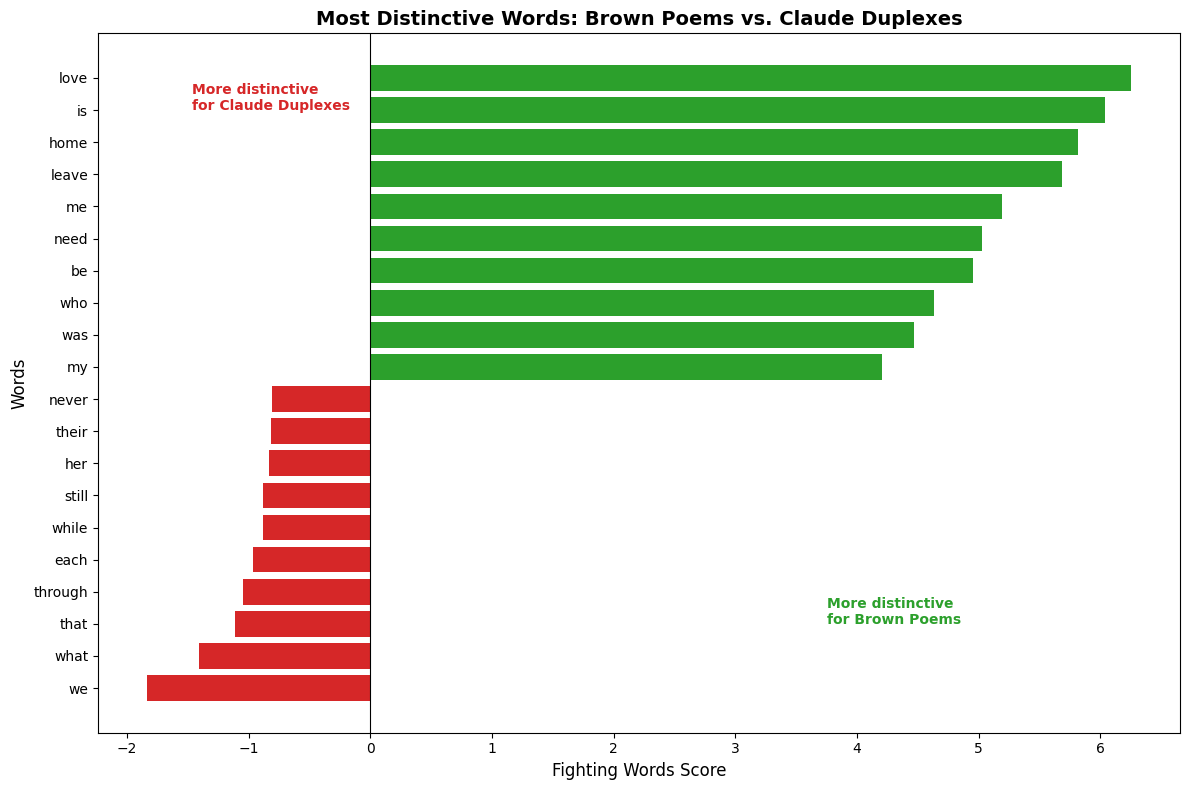

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the lowest 10 (most distinctive for claude duplexes)
lowest_10 = results[:10]

# Extract the highest 10 (most distinctive for brown_poems)
highest_10 = results[-10:]

# Combine them
words_to_plot = lowest_10 + highest_10
words = [item[0] for item in words_to_plot]
scores = [float(item[1]) for item in words_to_plot]

# Create the bar chart
plt.figure(figsize=(12, 8))
colors = ['#d62728' if score < 0 else '#2ca02c' for score in scores]
bars = plt.barh(words, scores, color=colors)

# Add a vertical line at x=0
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)

# Labels and title
plt.xlabel('Fighting Words Score', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.title('Most Distinctive Words: Brown Poems vs. Claude Duplexes', fontsize=14, fontweight='bold')

# Add a legend
plt.text(min(scores)*0.8, len(words)-2, 'More distinctive\nfor Claude Duplexes',
         color='#d62728', fontsize=10, fontweight='bold')
plt.text(max(scores)*0.6, 2, 'More distinctive\nfor Brown Poems',
         color='#2ca02c', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()